# Custom NMP environment

In [11]:
# Importing the dependencies
from scipy.integrate import odeint
import numpy as np
import random
import matplotlib.pyplot as plt

## Initialize the state space model

In [12]:
A = np.array([[-2, -3], [1, 0]])
# A@x_init
B = np.array([1, 0])
C = np.array([-1, 2])
D = np.array([0])


In [13]:
# Set the inputs
u0 = np.array([1])
x_init = np.array([0, 1])
x_init.shape

(2,)

## Verify working using odeint

In [14]:
dxdt = A@x_init + B*u0

In [15]:
y = C@x_init + D*u0

In [16]:
# Defining the differential
def differential(x, t, A, B, u):
    """
    Gives the differential output
    Output: array of size (2, 1)
    """
    dxdt = A@x + B*u
    return dxdt


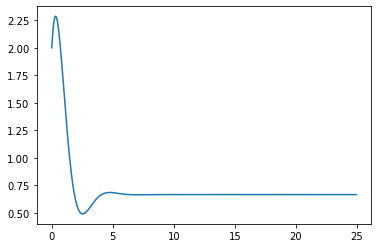

In [27]:
# Verify the response:
t = np.arange(0, 25, 0.05)
x = odeint(differential, x_init, t, args=(A, B, u0,))
y = C@x.T + D*u0
plt.plot(t, y)

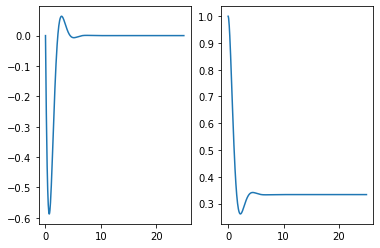

In [28]:
# Plot the states
plt.subplot(1, 2, 1)
plt.plot(t, x[:, 0])

plt.subplot(1, 2, 2)
plt.plot(t, x[:, 1])

In [18]:
# At a particular time step:
t = np.array([0.5])
u = 1
x = odeint(differential, x_init, t, args=(A, B, u, ))
y = C@x.T + D*u
print(f"Input: {u}\nState: {x}\nOutput: {y}")

Input: 1
State: [[0. 1.]]
Output: [2.]


In [19]:
y[0]

2.0

## Rewards

Setpoint: 2
Termination:
1. Output = setpoint for atleast 20 timesteps
2. Episode completion
3. Large error between output and setpoint

Penalty:
1. For high error: -5

In [20]:
def rewards(out, sp, track, tstep, nsteps):
    # Calcualte rewards:
    if(out == sp and track == 20):
        done = True
        reward = 5
        return done, reward
    elif(tstep == nsteps):
        done = True
        reward = 1
        return done, reward
    else:
        done = False
        reward = 0
        return done, reward


In [24]:
# Euler's method:
# Define prototype for reward function:
done = False
score = 0

t0 = 0
tend = 25
dt = 0.05
nsteps = int(tend / dt)
tstep = 0

track = 0
sp = 1
xc = x_init
while not done:
    # Send an input:
    u = np.array([1])
    t = tstep * dt 

    # Calculate x using Euler's method
    dxdt = A@xc + B*u
    x_next = xc + dxdt*dt

    y = C@x_next.T + D*u 
    out = y[0]

    if(out == sp):
        track += 1
    
    # Rewards
    done, reward = rewards(out, sp, track, tstep, nsteps)

    # Update
    score += reward
    xc = x_next
    tstep += 1


In [25]:
score

1